# CNN - 고양이, 개 이미지 분류

[https://www.kaggle.com/datasets/tongpython/cat-and-dog](https://www.kaggle.com/datasets/tongpython/cat-and-dog) 에서 배포하는 데이터셋

`cat.인덱스번호.jpg` 와 `dog.인덱스번호.jpg` 형식으로 개 이미지 5000개, 고양이 이미지 5000개로 구성되어 있다.

아래 URL을 통해 기본 파일 정리가 수행된 파일을 내려 받는다.

> [https://drive.google.com/file/d/1-uz8ZyrFQqEZSfk0vN7JpwSFS7qQd17u/view?usp=drive_link](https://drive.google.com/file/d/1-uz8ZyrFQqEZSfk0vN7JpwSFS7qQd17u/view?usp=drive_link)

## 이미지를 분류하면서 나타나는 문제들

### 1) 이미지 사이즈

* 이미지들의 사이즈가 각기 다른 경우 어떻게 할까?
* 이미지를 동일한 크기로 줄일 수 있다. 이미지를 줄이면서 가로, 세로 비율이 변경되어도 ‘분류’에서는 크게 문제되지 않는다.
* 하지만, ‘인식’에서는 문제가 될 수 있다.

### 2) 이미지 라벨링

* 이미지를 구했는데, 어떤 이미지인지 라벨링되지 않았다. 어떻게 할까?
* 이미지를 라벨링하고, Class 별로 디렉토리를 만들어 이미지를 저장하여 사용한다.
    > 예 : cat 폴더에는 고양이 사진, dog 폴더에는 강아지 사진을 나눠서 저장

### 3) 이미지 샘플 수

* 샘플 수가 적다면 과적합이 발생하기 쉽다.
* 과적합을 피하기 위해서는 더 많은 이미지 데이터가 필요하다.
* 데이터를 추가적으로 수집하거나 기존 데이터로부터 더 많은 데이터를 생성해야 한다.(이미지 증강)

---

## #01. 준비작업 

### [1] 패키지 참조


In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action="ignore")

from hossam.util import *
from hossam.plot import *
from hossam.tensor import *

import shutil
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2024-04-22 02:35:05.272845: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### [2] 데이터셋 준비하기

#### (1) 파일 압축 해제

데이터셋을 캐글로부터 다운로드 받은 후 적절한 위치에 압축을 해제한다.

압축을 해제하면 cats 폴더와 dogs 폴더에 각각 5000장의 이미지가 포함되어 있다.


In [2]:
# 압축파일의 경로
workspace_dir = "/Users/leekh/workspace-ml"
file_path = os.path.join(workspace_dir, "cats-and-dogs.zip")

# 압축을 해제할 경로
extract_dir = os.path.join(workspace_dir, "cats-and-dogs")

# 해당 폴더가 없다면 폴더를 생성하고 파일의 압축을 해제
if not os.path.exists(extract_dir):
    os.mkdir(extract_dir)

    zip_ref = zipfile.ZipFile(file_path, "r")
    zip_ref.extractall(extract_dir)
    zip_ref.close()

#### (2) 임의의 이미지 확인

##### 고양이 이미지

실행시마다 표시 이미지가 랜덤하게 바뀐다.


고양이 이미지 파일 수:  5000 개


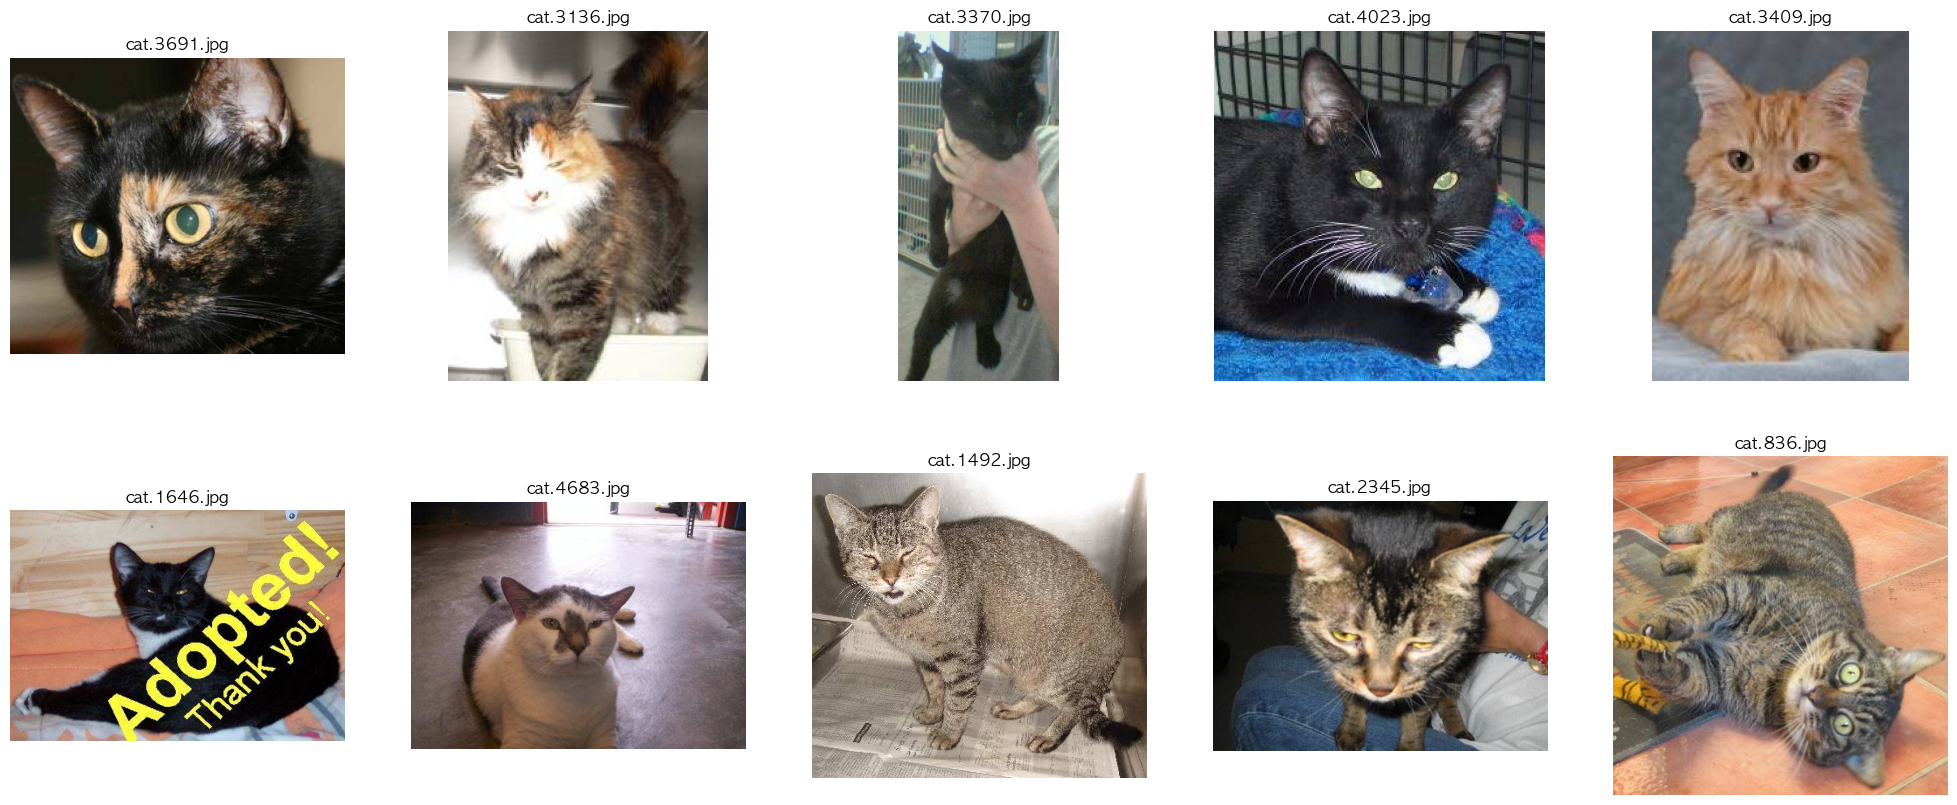

In [3]:
# 고양이 이미지 파일이 위치한 디렉토리 경로
cats_dir = os.path.join(extract_dir, "cats")
cats_file_list = os.listdir(cats_dir)

# 파일 수 확인
cats_len = len(cats_file_list)
print("고양이 이미지 파일 수: ", cats_len, "개")

rand = np.random.random_integers(0, cats_len - 1, 10)

fig, ax = plt.subplots(2, 5, figsize=(25, 10), dpi=100)

for i in range(0, len(ax)):
    for j in range(0, len(ax[i])):
        p = i * len(ax[i]) + j
        file_path = os.path.join(cats_dir, cats_file_list[rand[p]])
        img = load_image(file_path)
        ax[i][j].imshow(img)
        ax[i][j].axis("off")
        ax[i][j].set_title(cats_file_list[rand[p]])

plt.show()
plt.close()

##### 강아지 이미지

실행시마다 표시 이미지가 랜덤하게 바뀐다.


강아지 이미지 파일 수:  5000 개


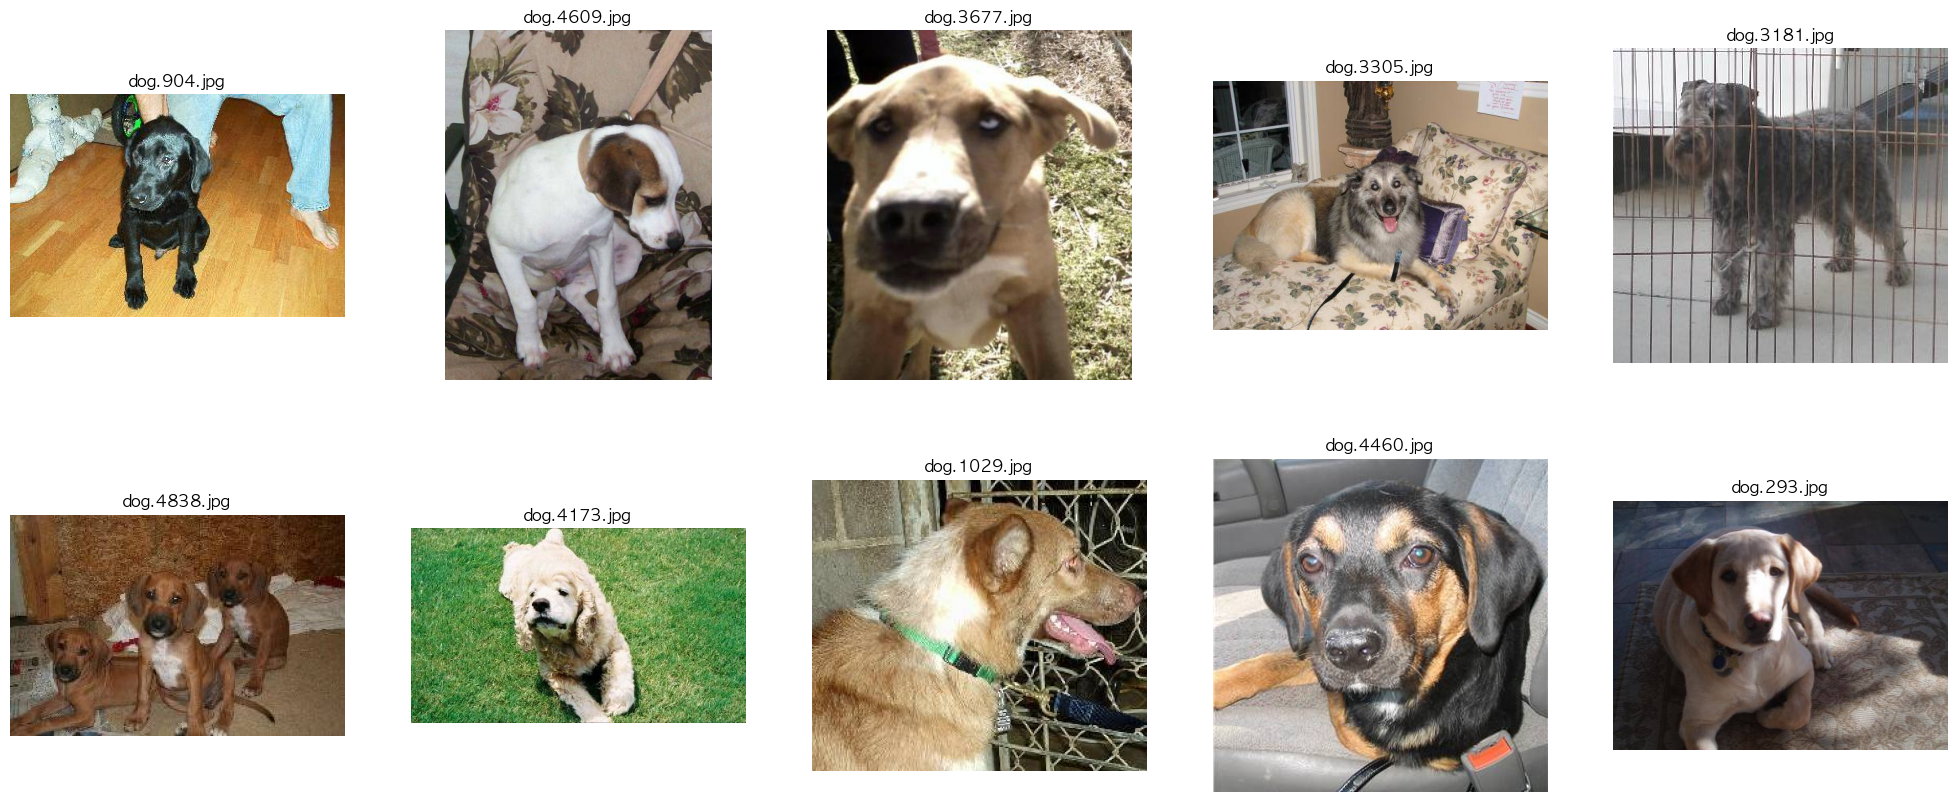

In [4]:
# 강아지 이미지 파일이 위치한 디렉토리
dogs_dir = os.path.join(extract_dir, "dogs")
dogs_file_list = os.listdir(dogs_dir)

# 파일 수 확인
dogs_len = len(dogs_file_list)
print("강아지 이미지 파일 수: ", dogs_len, "개")

rand = np.random.random_integers(0, dogs_len - 1, 10)

fig, ax = plt.subplots(2, 5, figsize=(25, 10), dpi=100)

for i in range(0, len(ax)):
    for j in range(0, len(ax[i])):
        p = i * len(ax[i]) + j
        file_path = os.path.join(dogs_dir, dogs_file_list[rand[p]])
        img = load_image(file_path)
        ax[i][j].imshow(img)
        ax[i][j].axis("off")
        ax[i][j].set_title(dogs_file_list[rand[p]])

plt.show()
plt.close()

> 출력결과를 통해 이미지의 해상도가 모두 다르다는 것을 알 수 있다. 이 경우 입력 데이터의 shape가 모두 상이하기 때문에 학습이 불가능하다. 그러므로 모든 이미지를 균일하게 리사이즈 해야 한다.
>
> 또한 학습용 이미지가 매우 부족하기 때문에 이미지를 반전, 회전, 색상 변환 등의 방법을 적용하여 학습 데이터를 증강시켜야 한다.


## #02. 이미지 데이터 전처리 방법 살펴보기

### [1] 이미지 전처리기 생성 - ImageDataGenerator 사용

ImageDataGenerator는 이미지 텐서 정규화, 이미지 크기 변경, 이미지 증강(Image Augmentation) 등 이미지 전처리 기능을 제공한다.


In [5]:
image_gen = ImageDataGenerator(
    rescale=1.0 / 255,  # 정규화(색상값을 0~1사이로 변경함)
    rotation_range=30,  # 이미지 무작위 회전 (30도 이내)
    width_shift_range=0.2,  # 가로 방향 이동 범위 (무작위 20% 이내)
    height_shift_range=0.2,  # 세로 방향 이동 범위 (무작위 20% 이내)
    shear_range=0.2,  # 층 밀리기 강도 (무작위 20% 이내)
    zoom_range=0.2,  # 줌 범위 (무작위 20% 이내)
    brightness_range=[0.5, 1.0],  # 이미지 밝기
    horizontal_flip=True,  # 수평 뒤집기
    vertical_flip=True,  # 수직 뒤집기
    fill_mode="nearest",  # 이미지 변형 시 채울 픽셀
    validation_split=0.2,  # 검증 데이터 비율
)

### [2] 임의의 이미지 전처리


고양이 이미지 파일 수:  5000 개


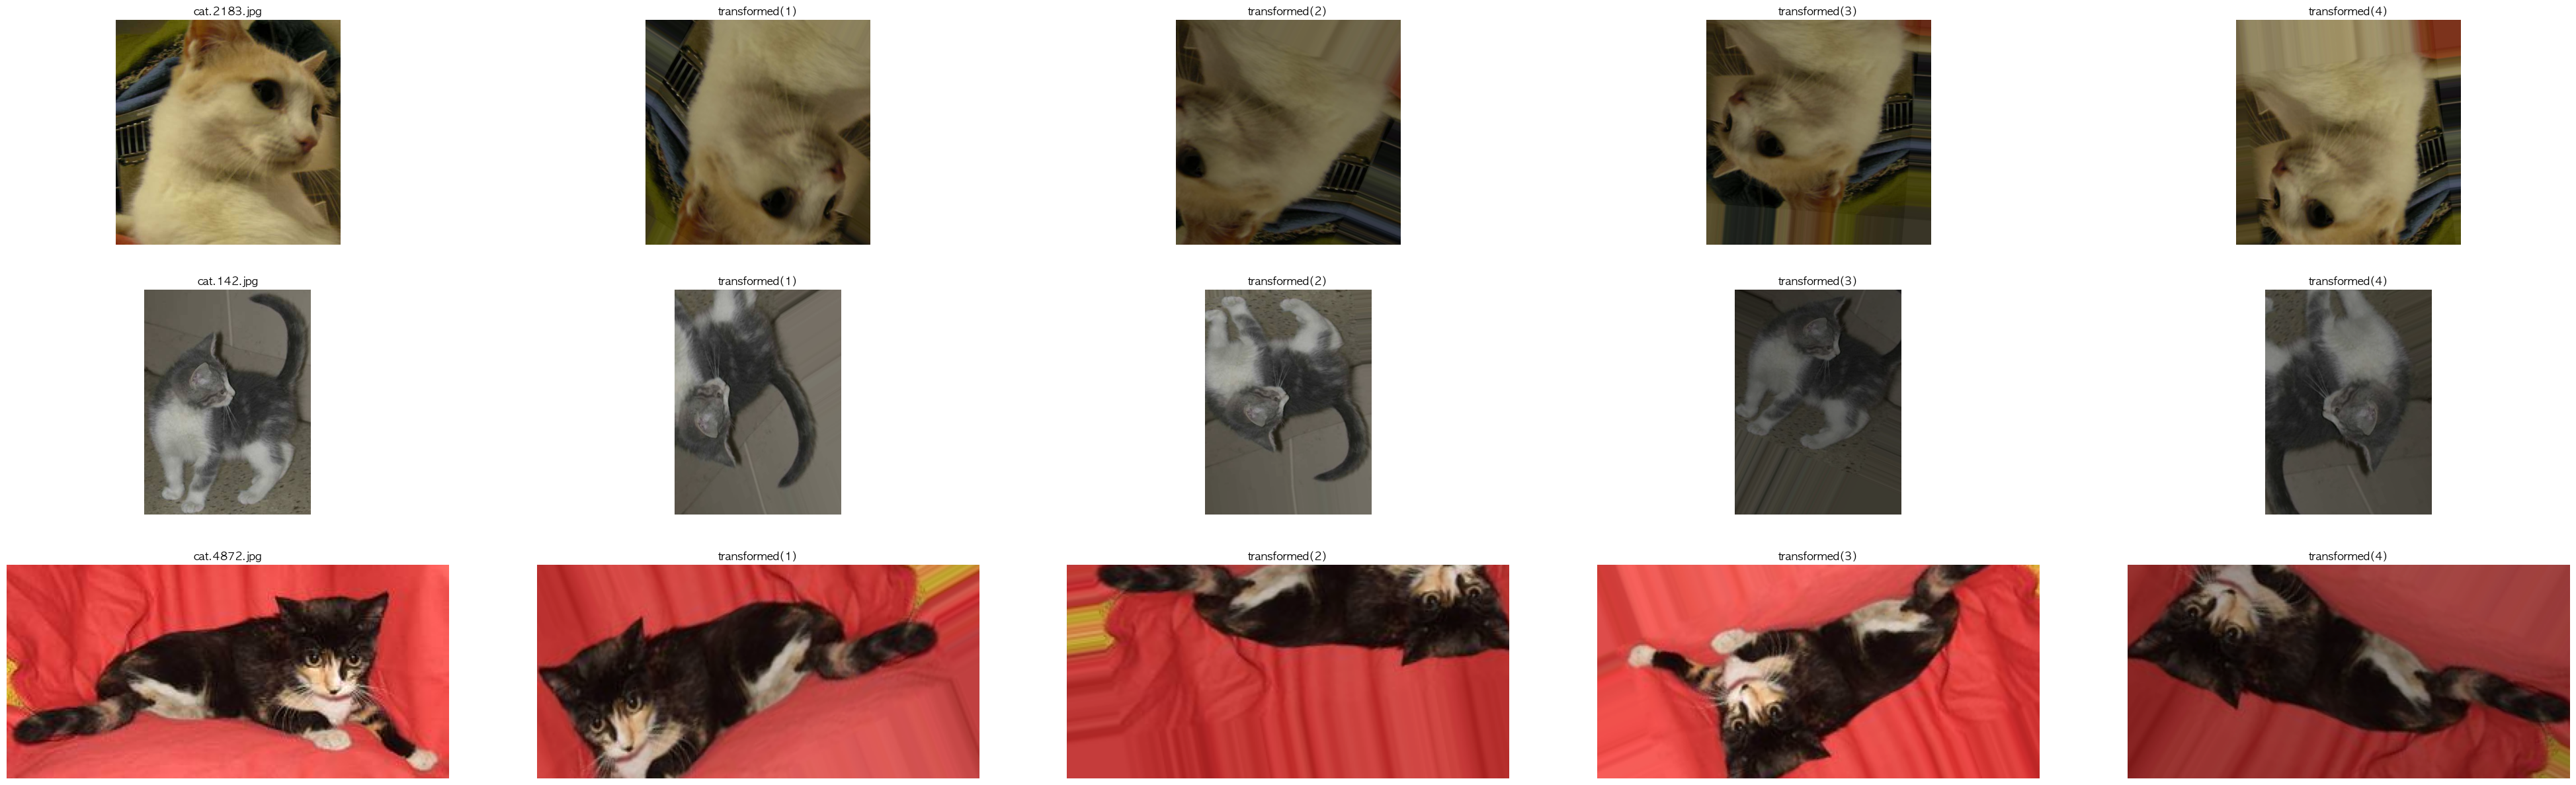

In [6]:
# 고양이 이미지 파일이 위치한 디렉토리 경로
cats_dir = os.path.join(extract_dir, "cats")
cats_file_list = os.listdir(cats_dir)

# 파일 수 확인
cats_len = len(cats_file_list)
print("고양이 이미지 파일 수: ", cats_len, "개")

rand = np.random.random_integers(0, cats_len - 1, 3)

fig, ax = plt.subplots(3, 5, figsize=(50, 15), dpi=100)

for i in range(0, len(ax)):
    target_file = cats_file_list[rand[i]]

    file_path = os.path.join(cats_dir, target_file)
    img = load_image(file_path)

    ax[i][0].imshow(img)
    ax[i][0].axis("off")
    ax[i][0].set_title(target_file)

    # 전처리 적용
    img_flow = image_gen.flow(np.array([img]))

    for j in range(1, 5):
        # 이미지 추출
        data = next(img_flow)
        created_img = data[0]

        ax[i][j].imshow(created_img)
        ax[i][j].axis("off")
        ax[i][j].set_title(f"transformed({j})")

plt.show()
plt.close()

### [4] 이미지 데이터 전처리 수행

디렉토리에 Target 별로 나누어 저장된 이미지 파일 또는 텐서로 저장된 이미지를 바로 가져와서 전처리하고 모델에 집어넣는다.

이미지들이 디렉토리별로 나누어져 있다면 ImageDataGenerator 클래스의 flow_from_directory 메서드를 사용할 수 있는데, 배치사이즈 지정, 클래스 모드 설정이 가능하다.

#### (1) 훈련용 이미지 데이터 생성


In [7]:
classes = os.listdir(extract_dir)
classes

['dogs', 'cats']

In [8]:
train_set = image_gen.flow_from_directory(
    extract_dir,  # 이미지 파일이 위치한 폴더
    classes=classes,  # 분류할 클래스명
    batch_size=16,  # 배치 사이즈
    class_mode="binary",  # 이진분류용임을 명시(binary or categorical)
    target_size=(64, 64),  # 변환될 이미지 해상도
    shuffle=True,  # 이미지 섞기
    color_mode="rgb",  # 컬러 이미지
    seed=get_random_state(),  # 랜덤 시드값
    subset="training",  # 훈련용 데이터 생성임을 명시
)

train_set.class_indices

Found 8000 images belonging to 2 classes.


{'dogs': 0, 'cats': 1}

#### (2) 검증용 데이터 생성


In [9]:
test_set = image_gen.flow_from_directory(
    extract_dir,  # 이미지 파일이 위치한 폴더
    classes=classes,  # 분류할 클래스명
    batch_size=16,  # 배치 사이즈
    class_mode="binary",  # 이진분류용임을 명시(binary or categorical)
    target_size=(64, 64),  # 변환될 이미지 해상도
    shuffle=True,  # 이미지 섞기
    color_mode="rgb",  # 컬러 이미지
    seed=get_random_state(),  # 랜덤 시드값
    subset="validation",  # 검증용 데이터 생성임을 명시
)

test_set.class_indices

Found 2000 images belonging to 2 classes.


{'dogs': 0, 'cats': 1}

## #03. 훈련 모델 적합

### [1] 모델 정의하기


In [10]:
model = tf_create(
    layer=[
        # cnn (1)
        {
            "type": "conv2d",
            "filters": 16,
            "kernel_size": 6,
            "padding": "same",
            "input_shape": (64, 64, 3),
        },
        {"type": "batchnorm"},
        {"type": "activation", "function": "relu"},
        {"type": "maxpooling", "pool_size": (2, 2)},
        {"type": "dropout", "rate": 0.1},
        # cnn (2)
        {
            "type": "conv2d",
            "filters": 32,
            "kernel_size": 5,
            "padding": "same",
        },
        {"type": "batchnorm"},
        {"type": "activation", "function": "relu"},
        {"type": "maxpooling", "pool_size": (2, 2)},
        {"type": "dropout", "rate": 0.1},
        # cnn (3)
        {
            "type": "conv2d",
            "filters": 64,
            "kernel_size": 4,
            "padding": "same",
        },
        {"type": "batchnorm"},
        {"type": "activation", "function": "relu"},
        {"type": "maxpooling", "pool_size": (2, 2)},
        {"type": "dropout", "rate": 0.1},
        # cnn (4)
        {
            "type": "conv2d",
            "filters": 128,
            "kernel_size": 3,
            "padding": "same",
        },
        {"type": "batchnorm"},
        {"type": "activation", "function": "relu"},
        {"type": "maxpooling", "pool_size": (2, 2)},
        {"type": "dropout", "rate": 0.1},
        # 단일층
        {"type": "flatten"},
        {"type": "dense", "units": 64},
        {"type": "batchnorm"},
        {"type": "activation", "function": "relu"},
        {"type": "dense", "units": 1},
        {"type": "batchnorm"},
        {"type": "activation", "function": "sigmoid"},
    ],
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["acc"],
)

model.summary()

{'type': 'conv2d', 'filters': 16, 'kernel_size': 6, 'padding': 'same', 'input_shape': (64, 64, 3)}
{'type': 'batchnorm'}
{'type': 'activation', 'function': 'relu'}
{'type': 'maxpooling', 'pool_size': (2, 2)}
{'type': 'dropout', 'rate': 0.1}
{'type': 'conv2d', 'filters': 32, 'kernel_size': 5, 'padding': 'same'}
{'type': 'batchnorm'}
{'type': 'activation', 'function': 'relu'}
{'type': 'maxpooling', 'pool_size': (2, 2)}
{'type': 'dropout', 'rate': 0.1}
{'type': 'conv2d', 'filters': 64, 'kernel_size': 4, 'padding': 'same'}
{'type': 'batchnorm'}
{'type': 'activation', 'function': 'relu'}
{'type': 'maxpooling', 'pool_size': (2, 2)}
{'type': 'dropout', 'rate': 0.1}
{'type': 'conv2d', 'filters': 128, 'kernel_size': 3, 'padding': 'same'}
{'type': 'batchnorm'}
{'type': 'activation', 'function': 'relu'}
{'type': 'maxpooling', 'pool_size': (2, 2)}
{'type': 'dropout', 'rate': 0.1}
{'type': 'flatten'}
{'type': 'dense', 'units': 64}
{'type': 'batchnorm'}
{'type': 'activation', 'function': 'relu'}
{'t

### [2] 학습하기


Epoch 1/1000
500/500 [==============================] - 42s 81ms/step - loss: 0.6844 - acc: 0.5871 - val_loss: 0.7431 - val_acc: 0.5035 - lr: 0.0010
Epoch 2/1000
500/500 [==============================] - 40s 80ms/step - loss: 0.6613 - acc: 0.6015 - val_loss: 0.7484 - val_acc: 0.5935 - lr: 0.0010
Epoch 3/1000
500/500 [==============================] - 42s 85ms/step - loss: 0.6510 - acc: 0.6199 - val_loss: 1.1246 - val_acc: 0.5050 - lr: 0.0010
Epoch 4/1000
500/500 [==============================] - 45s 89ms/step - loss: 0.6382 - acc: 0.6320 - val_loss: 0.6381 - val_acc: 0.6350 - lr: 0.0010
Epoch 5/1000
500/500 [==============================] - 47s 93ms/step - loss: 0.6303 - acc: 0.6441 - val_loss: 0.6379 - val_acc: 0.6190 - lr: 0.0010
Epoch 6/1000
500/500 [==============================] - 46s 92ms/step - loss: 0.6204 - acc: 0.6511 - val_loss: 0.6284 - val_acc: 0.6400 - lr: 0.0010
Epoch 7/1000
500/500 [==============================] - 46s 92ms/step - loss: 0.6097 - acc: 0.6658 - val_l

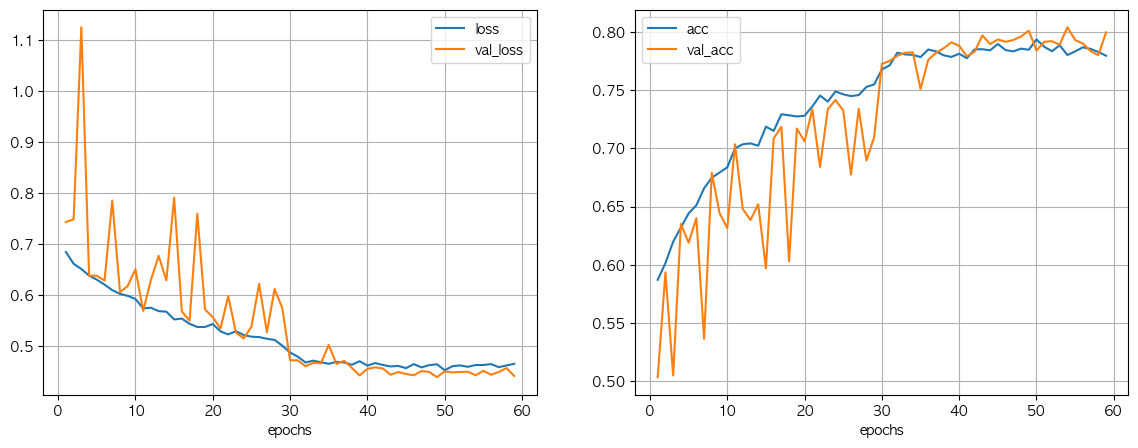

CPU times: user 3h 23min 20s, sys: 1h 34s, total: 4h 23min 55s
Wall time: 50min 7s


In [11]:
%%time

batch_size = 16

# result = model.fit(
#     train_set,
#     steps_per_epoch=train_set.samples // batch_size,
#     validation_data=test_set,
#     validation_steps=test_set.samples // batch_size,
#     epochs=500,
#     callbacks=[
#         EarlyStopping(patience=10, restore_best_weights=True, verbose=0),
#         ReduceLROnPlateau(factor=0.1, patience=5, verbose=0),
#     ],
# )

result = tf_train(
    model=model,
    x_train=train_set,
    x_test=test_set,
    epochs=1000,
    steps_per_epoch=train_set.samples // batch_size,
    validation_steps=test_set.samples // batch_size,
    verbose=1
)

tf_result(result)

## #04. 학습 결과 확인

### [1] 검증 데이터의 라벨 확인


In [12]:
y = test_set.classes
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

### [2] 검증 데이터에 대한 예측값


In [13]:
y_pred_proba = model.predict(test_set)
y_pred_proba

125/125 [==============================] - 8s 64ms/step


array([[0.03932104],
       [0.4090951 ],
       [0.21145208],
       ...,
       [0.3935165 ],
       [0.4890361 ],
       [0.73933387]], dtype=float32)

In [14]:
y_pred = np.where(y_pred_proba > 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

### [3] 혼동 행렬


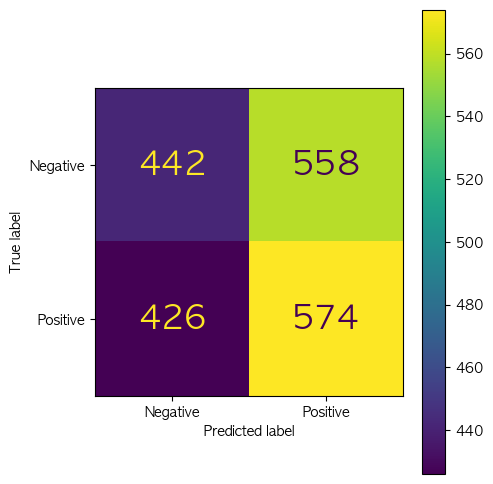

In [15]:
my_confusion_matrix(y, y_pred, figsize=(5, 5), dpi=100)

## #05. 학습 결과 적용

### [1] 임의의 이미지 가져오기

#### (1) 개 이미지


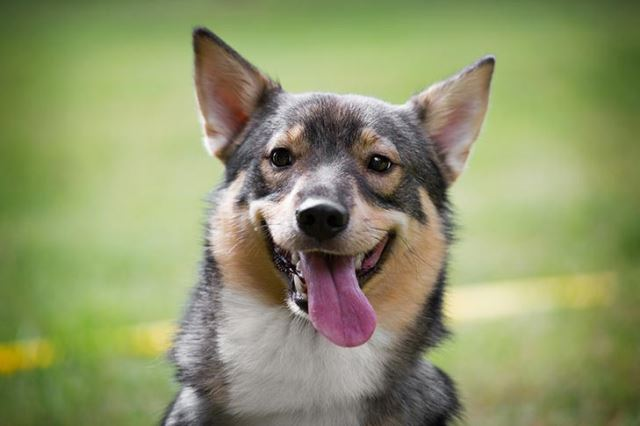

In [31]:
dog_img = load_image("res/개.jpg")
dog_img

#### (2) 고양이 이미지


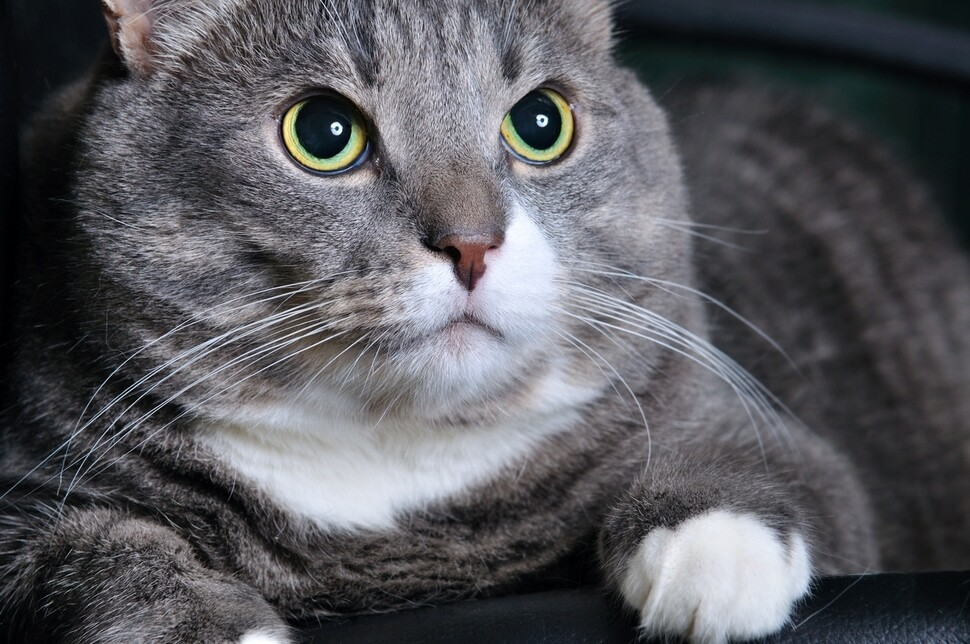

In [32]:
cat_img = load_image("res/고양이.jpg")
cat_img

### [2] 이미지 전처리


In [33]:
# 훈련 데이터와 동일한 크기로 리사이즈
dog_tune = tune_image(dog_img, size=(64, 64))
cat_tune = tune_image(cat_img, size=(64, 64))

# 이미지 데이터 변환
dog_flow = image_gen.flow(np.array([dog_tune]))
cat_flow = image_gen.flow(np.array([cat_tune]))

# 예측값 생성
dog_pred_proba = model.predict(dog_flow)
dog_pred = np.where(dog_pred_proba > 0.5, 1, 0)

cat_pred_proba = model.predict(cat_flow)
cat_pred = np.where(cat_pred_proba > 0.5, 1, 0)

dog_pred, cat_pred

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


(array([[0]]), array([[1]]))

#### [3] 예측 결과 확인


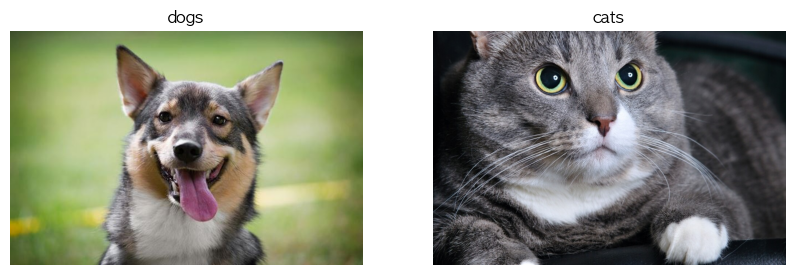

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)

ax[0].imshow(dog_img)
ax[0].axis("off")
ax[0].set_title(classes[dog_pred[0][0]])

ax[1].imshow(cat_img)
ax[1].axis("off")
ax[1].set_title(classes[cat_pred[0][0]])

plt.show()
plt.close()